In [138]:
import kagglehub
karkavelrajaj_amazon_sales_dataset_path = kagglehub.dataset_download('karkavelrajaj/amazon-sales-dataset')

print('Data source import complete.')


Data source import complete.


 this is the Amazon Sales Dataset, i want to see wich product have the best rating and reviews to make more sales
* First, I check the unique values present in the dataset and perform data cleaning and preprocessing to ensure the accuracy of the extracted information.
* I then check for missing values and find that the rating and rating count columns have very few missing values. I use the KNN imputer to fill these missing values.
* After thorough exploration, I identify the highest-rated categories and products, along with user details such as username, user ID, product ID, etc.
* I calculate the average rating for each category to determine which categories receive the highest ratings.
* I find the correlation among various features to assess whether changes in product prices affect product ratings.
* I perform sentiment analysis to determine the count and percentage of positive, negative, and neutral sentiments, and create various visualization plots.
* Finally, I build a recommendation system using both User-based and Content-based methods to recommend products, and derive various insights to suggest products effectively.


| Column Name            | Description                                                                                 |
|------------------------|---------------------------------------------------------------------------------------------|
| `product_id`           | Unique identifier for each product listed on Amazon.                                        |
| `product_name`         | Name of the product as listed on Amazon.                                                    |
| `category`             | Category or type of product (e.g., electronics, clothing, etc.).                            |
| `discounted_price`     | Current price of the product after any discounts are applied.                               |
| `actual_price`         | Original price of the product before any discounts.                                         |
| `discount_percentage`  | Percentage discount applied to the product.                                                 |
| `rating`               | Average rating of the product based on customer feedback.                                   |
| `rating_count`         | Total number of ratings received by the product.                                            |
| `about_product`        | Brief description or highlights about the product.                                          |
| `user_id`              | Unique identifier for each user who left a review.                                          |
| `user_name`            | Display name of the user who left the review.                                               |
| `review_id`            | Unique identifier for each review submitted by users.                                       |
| `review_title`         | Title of the user’s review for the product.                                                 |
| `review_content`       | Full content of the user’s review, detailing their experience with the product.             |
| `img_link`             | URL link to the product's image as displayed on Amazon.                                     |
| `product_link`         | URL link to the product's listing page on Amazon.                                           |


In [139]:
!pip install pandas textblob
!pip install wordcloud matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
!pip install kaggle
import re
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [140]:
df=pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1W

In [141]:
print(f"The Dataset Columns are: {df.columns}")

The Dataset Columns are: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [142]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set display option to show full column names
pd.set_option('display.max_colwidth', None)

In [143]:
unique_discounted_prices = df['discounted_price'].unique()[:50]
print(unique_discounted_prices)


['₹399' '₹199' '₹329' '₹154' '₹149' '₹176.63' '₹229' '₹499' '₹299' '₹219'
 '₹350' '₹159' '₹349' '₹13,999' '₹249' '₹13,490' '₹970' '₹279' '₹59'
 '₹11,499' '₹14,999' '₹179' '₹389' '₹599' '₹99' '₹899' '₹32,999' '₹209'
 '₹19,999' '₹999' '₹333' '₹507' '₹309' '₹1,199' '₹799' '₹6,999' '₹230'
 '₹649' '₹15,999' '₹348' '₹32,990' '₹139' '₹263' '₹7,999' '₹1,599'
 '₹26,999' '₹115' '₹10,901' '₹1,434' '₹7,299']


In [144]:
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['discounted_price'].describe()

,discounted_price
count,1465.000000
mean,3125.310874
std,6944.304394
min,39.000000
25%,325.000000
50%,799.000000
75%,1999.000000
max,77990.000000


In [145]:
unique_actual_prices = df['actual_price'].unique()[:50]
print(unique_actual_prices)

['₹1,099' '₹349' '₹1,899' '₹699' '₹399' '₹1,000' '₹499' '₹299' '₹999'
 '₹339' '₹799' '₹700' '₹899' '₹24,999' '₹21,990' '₹1,799' '₹22,900' '₹199'
 '₹19,990' '₹19,999' '₹1,999' '₹750' '₹599' '₹666.66' '₹1,900' '₹45,999'
 '₹695' '₹34,999' '₹1,599' '₹1,208' '₹475' '₹395' '₹2,199' '₹500' '₹2,100'
 '₹12,999' '₹1,399' '₹21,999' '₹1,499' '₹47,900' '₹845' '₹1,400' '₹14,990'
 '₹2,999' '₹42,999' '₹30,990' '₹3,999' '₹249' '₹19,125' '₹1,299']


In [146]:
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
print("Sumamry Statistics of Actual Price is:\n", df['actual_price'].describe())

Sumamry Statistics of Actual Price is:
 count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64


In [147]:
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = df['rating'].astype(str).str.replace('|', '', regex=False)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
missing_values = df.isnull().sum() / len(df) * 100
missing_values

,0
product_id,0.000000
product_name,0.000000
category,0.000000
discounted_price,0.000000
actual_price,0.000000
discount_percentage,0.000000
rating,0.068259
rating_count,0.136519
about_product,0.000000
user_id,0.000000


In [148]:
knn_imputer = KNNImputer(n_neighbors=5)
columns_to_impute = ['rating', 'rating_count']
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])
misisng_values_ratings_after_imputation = df['rating'].isnull().sum()/len(df)*100
misisng_values_rating_counts_after_imputation = df['rating_count'].isnull().sum()/len(df)*100

print("Missing values in Ratings Column after Imputation:", misisng_values_ratings_after_imputation)
print("Missing values in  Rating Counts Column after Imputation:", misisng_values_rating_counts_after_imputation)


Missing values in Ratings Column after Imputation: 0.0
Missing values in  Rating Counts Column after Imputation: 0.0


In [149]:
print("The Duplicates present in the Dataset are: ", df.duplicated().any())
print("The Number of Duplicates present in the Dataset are: ", df.duplicated().sum())

The Duplicates present in the Dataset are:  False
The Number of Duplicates present in the Dataset are:  0


In [150]:
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax()]
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]
top_10_products_by_category = top_products_by_category.head(4)
top_10_products_by_category


,category,product_id,product_name,rating
1157,Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,B0912WJ87V,"Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black",3.8
695,Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver",4.3
906,Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,B009LJ2BXA,"Hp Wired On Ear Headphones With Mic With 3.5 Mm Drivers, In-Built Noise Cancelling, Foldable And Adjustable For Laptop/Pc/Office/Home/ 1 Year Warranty (B4B09Pa)",3.5
748,Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,B08SCCG9D4,"JBL Commercial CSLM20B Auxiliary Omnidirectional Lavalier Microphone with Battery for Content Creation, Voiceover/Dubbing, Recording (Black,Small)",3.9


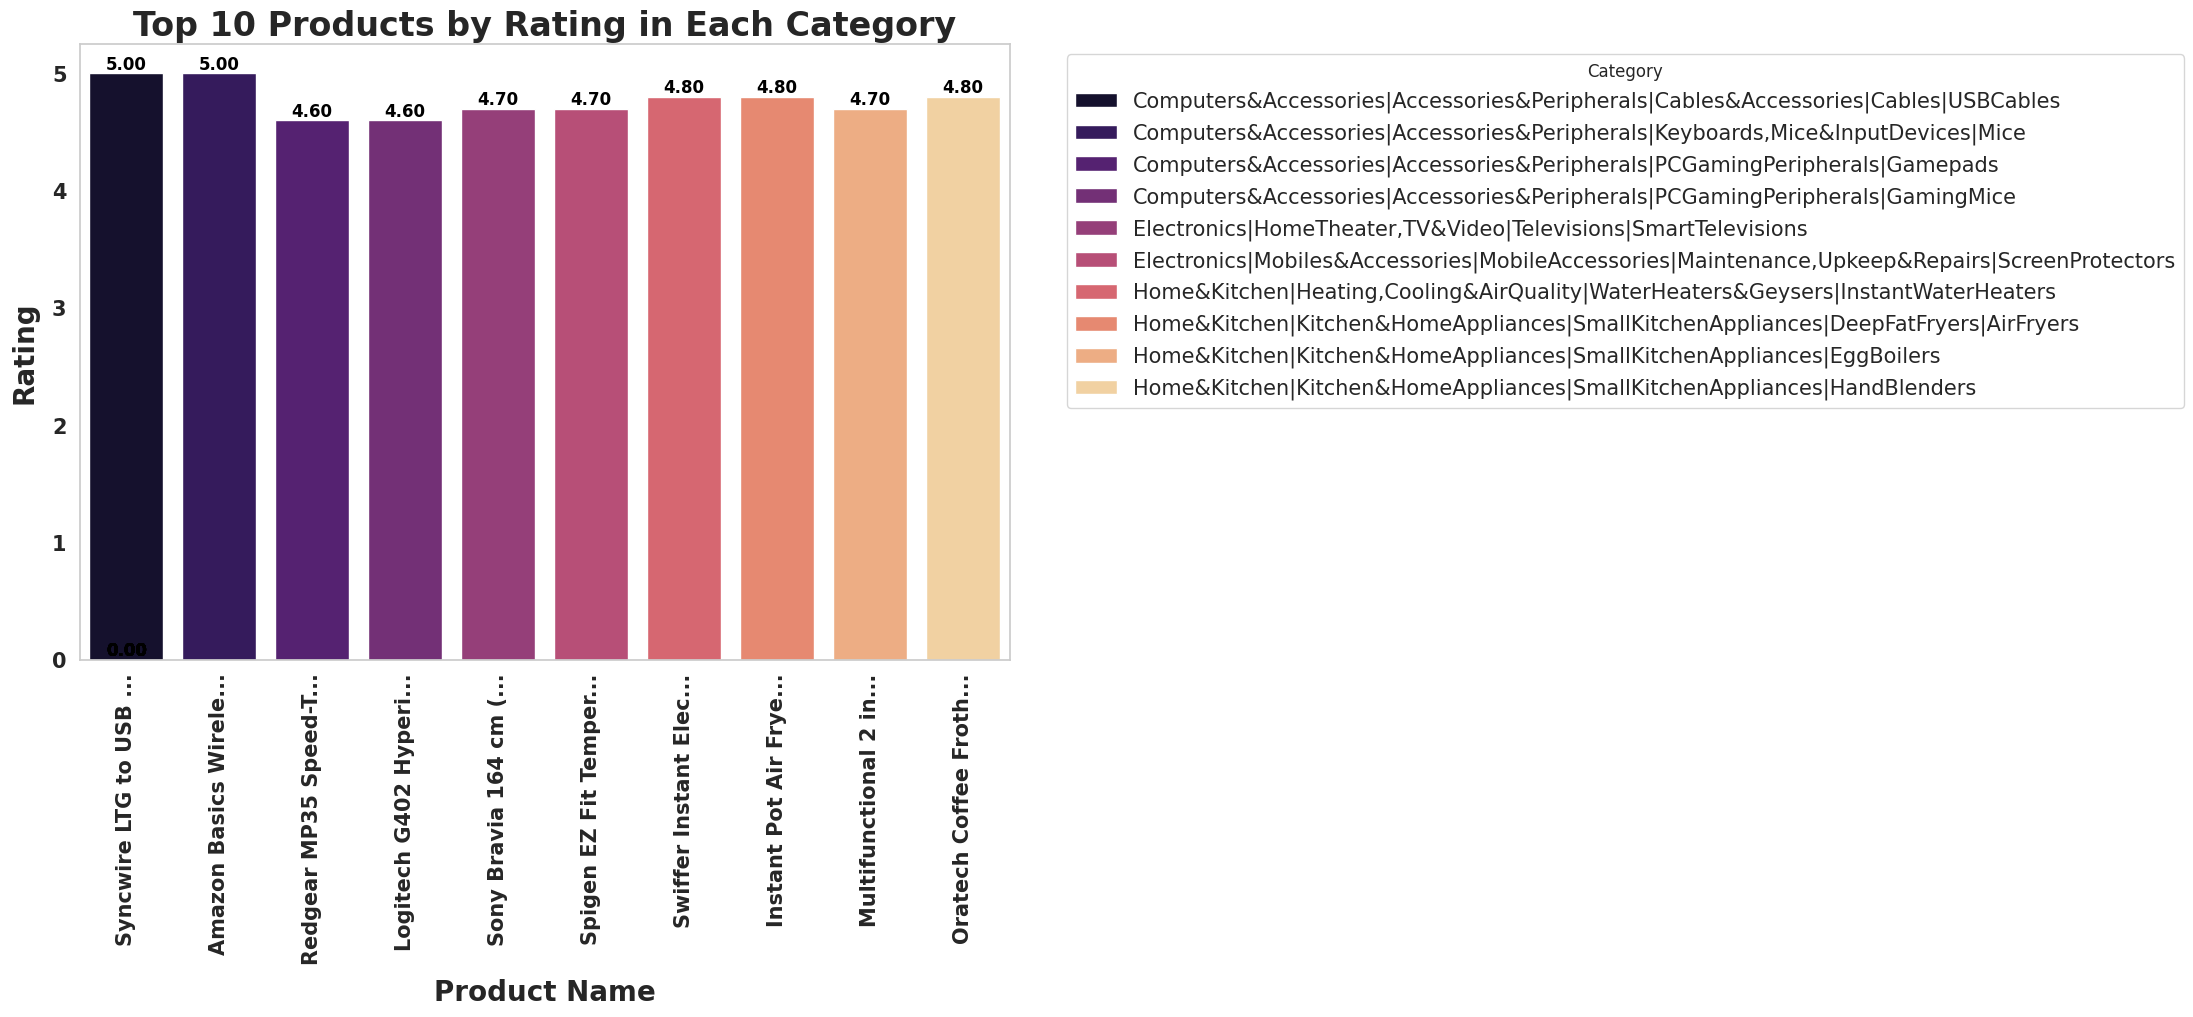

In [151]:
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax()]
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]
top_10_products = top_products_by_category.nlargest(10, 'rating')
top_10_products_sorted = top_10_products.sort_values(by='category')
top_10_products_sorted['short_product_name'] = top_10_products_sorted['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=top_10_products_sorted, x='short_product_name', y='rating', hue='category', dodge=False, palette='magma')
plt.title('Top 10 Products by Rating in Each Category', fontsize=24, fontweight='bold')
plt.ylabel('Rating', fontsize=20, fontweight='bold', labelpad=10)
plt.xlabel('Product Name', fontsize=20, fontweight='bold', labelpad=10)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=12)
plt.xticks(fontsize=15, fontweight='bold', rotation=90)
plt.yticks(fontsize=15, fontweight='bold')
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [152]:
least_products_by_category = df.loc[df.groupby('category')['rating'].idxmin()]
least_products_by_category = least_products_by_category[['category', 'product_id', 'product_name', 'rating']]
least_10_products = least_products_by_category.nsmallest(10, 'rating')
least_10_products_sorted = least_10_products.sort_values(by='category')
least_10_products_sorted

,category,product_id,product_name,rating
282,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0B94JPY2N,"Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)",3.0
263,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",B09F6D21BY,7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,3.0
545,Electronics|WearableTechnology|SmartWatches,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black),2.8
1309,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters",B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-K0 2215,2.0
1251,Home&Kitchen|Kitchen&HomeAppliances|SewingMachines&Accessories|Sewing&EmbroideryMachines,B08XLR6DSB,"akiara - Makes life easy Electric Handy Sewing/Stitch Handheld Cordless Portable White Sewing Machine for Home Tailoring, Hand Machine | Mini Silai | White Hand Machine with Adapter",3.1
1243,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BFBNXS94,"Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)",2.3
1286,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders,B0BNDGL26T,"MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)",2.8
1314,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|Juicers,B08TT63N58,"ROYAL STEP - AMAZON'S BRAND - Portable Electric USB Juice Maker Juicer Bottle Blender Grinder Mixer,4 Blades Rechargeable Bottle with (Multi color) (MULTI)",3.1
1356,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging,2.6
1449,Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1,2.9


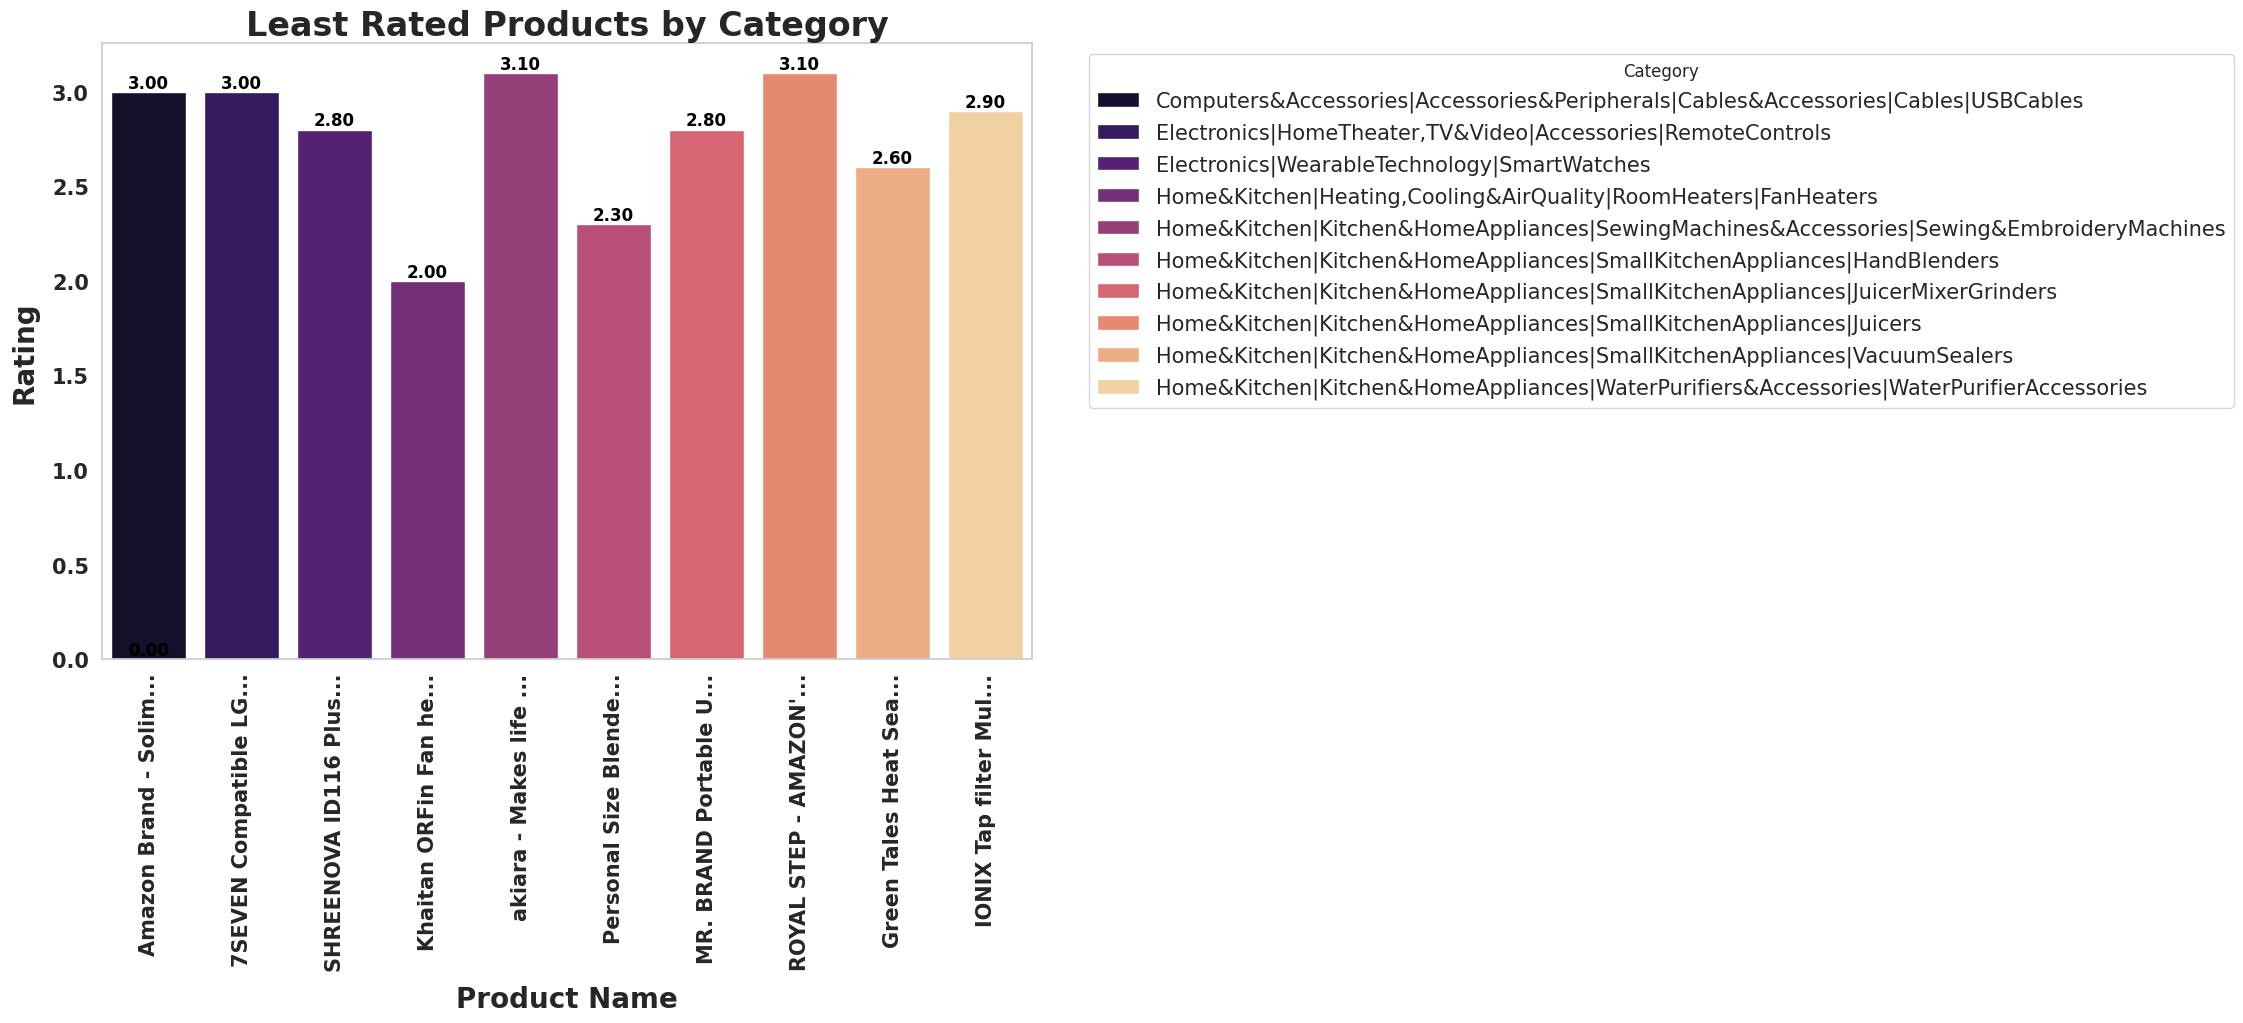

In [153]:
least_products_by_category = df.loc[df.groupby('category')['rating'].idxmin()]
least_products_by_category = least_products_by_category[['category', 'product_id', 'product_name', 'rating']]

least_10_products = least_products_by_category.nsmallest(10, 'rating')

least_10_products_sorted = least_10_products.sort_values(by='category')

least_10_products_sorted['short_product_name'] = least_10_products_sorted['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=least_10_products_sorted, x='short_product_name', y='rating', hue='category', dodge=False, palette='magma')
plt.title('Least Rated Products by Category', fontsize=24, fontweight='bold')
plt.ylabel('Rating', fontsize=20, fontweight='bold', labelpad=10)
plt.xlabel('Product Name', fontsize=20, fontweight='bold', labelpad=10)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=12)
plt.xticks(fontsize=15, fontweight='bold', rotation=90)
plt.yticks(fontsize=15, fontweight='bold')
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


summary :

* The highest rated product in the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | DVI Cables` category is **AmazonBasics 6 Feet DisplayPort to DisplayPort Cable** with a rating of **4.4**.
* In the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | Ethernet Cables` category, the **Quantum RJ45 Ethernet Patch Cable** also has a high rating of **4.4**.
* The lowest rated product in the `Home & Kitchen | Heating, Cooling & Air Quality | Room Heaters | Fan Heaters` category is **Khaitan ORFin Fan Heater** with a rating of **2.0**.


In [154]:
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]
top_rated_products

,category,product_id,product_name,rating
775,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",B09ZHCJDP1,"Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",5.0
174,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0BP7XLX48,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",5.0
324,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",5.0
1299,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers,B0B53DS4TF,"Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)",4.8
1145,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",B0BR4F878Q,"Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))",4.8
1201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)",4.8
1388,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",B0BP89YBC1,Campfire Spring Chef Prolix Instant Portable Water Heater Geyser 1Ltr. for Use Home Stainless Steel Baking Rack | Restaurant | Office | Labs | Clinics | Saloon | with Installation Kit (With MCB),4.7
1223,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BM4KTNL1,"FIGMENT Handheld Milk Frother Rechargeable, 3-Speed Electric Frother for Coffee with 2 Whisks and Coffee Decoration Tool, Coffee Frother Mixer, CRESCENT ENTERPRISES VRW0.50BK (A1)",4.7
1275,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|EggBoilers,B0BM9H2NY9,Multifunctional 2 in 1 Electric Egg Boiling Steamer Egg Frying Pan Egg Boiler Electric Automatic Off with Egg Boiler Machine Non-Stick Electric Egg Frying Pan-Tiger Woods (Multy),4.7
1226,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BLC2BYPX,"Zuvexa USB Rechargeable Electric Foam Maker - Handheld Milk Wand Mixer Frother for Hot Milk, Hand Blender Coffee, Egg Beater (Black)",4.7


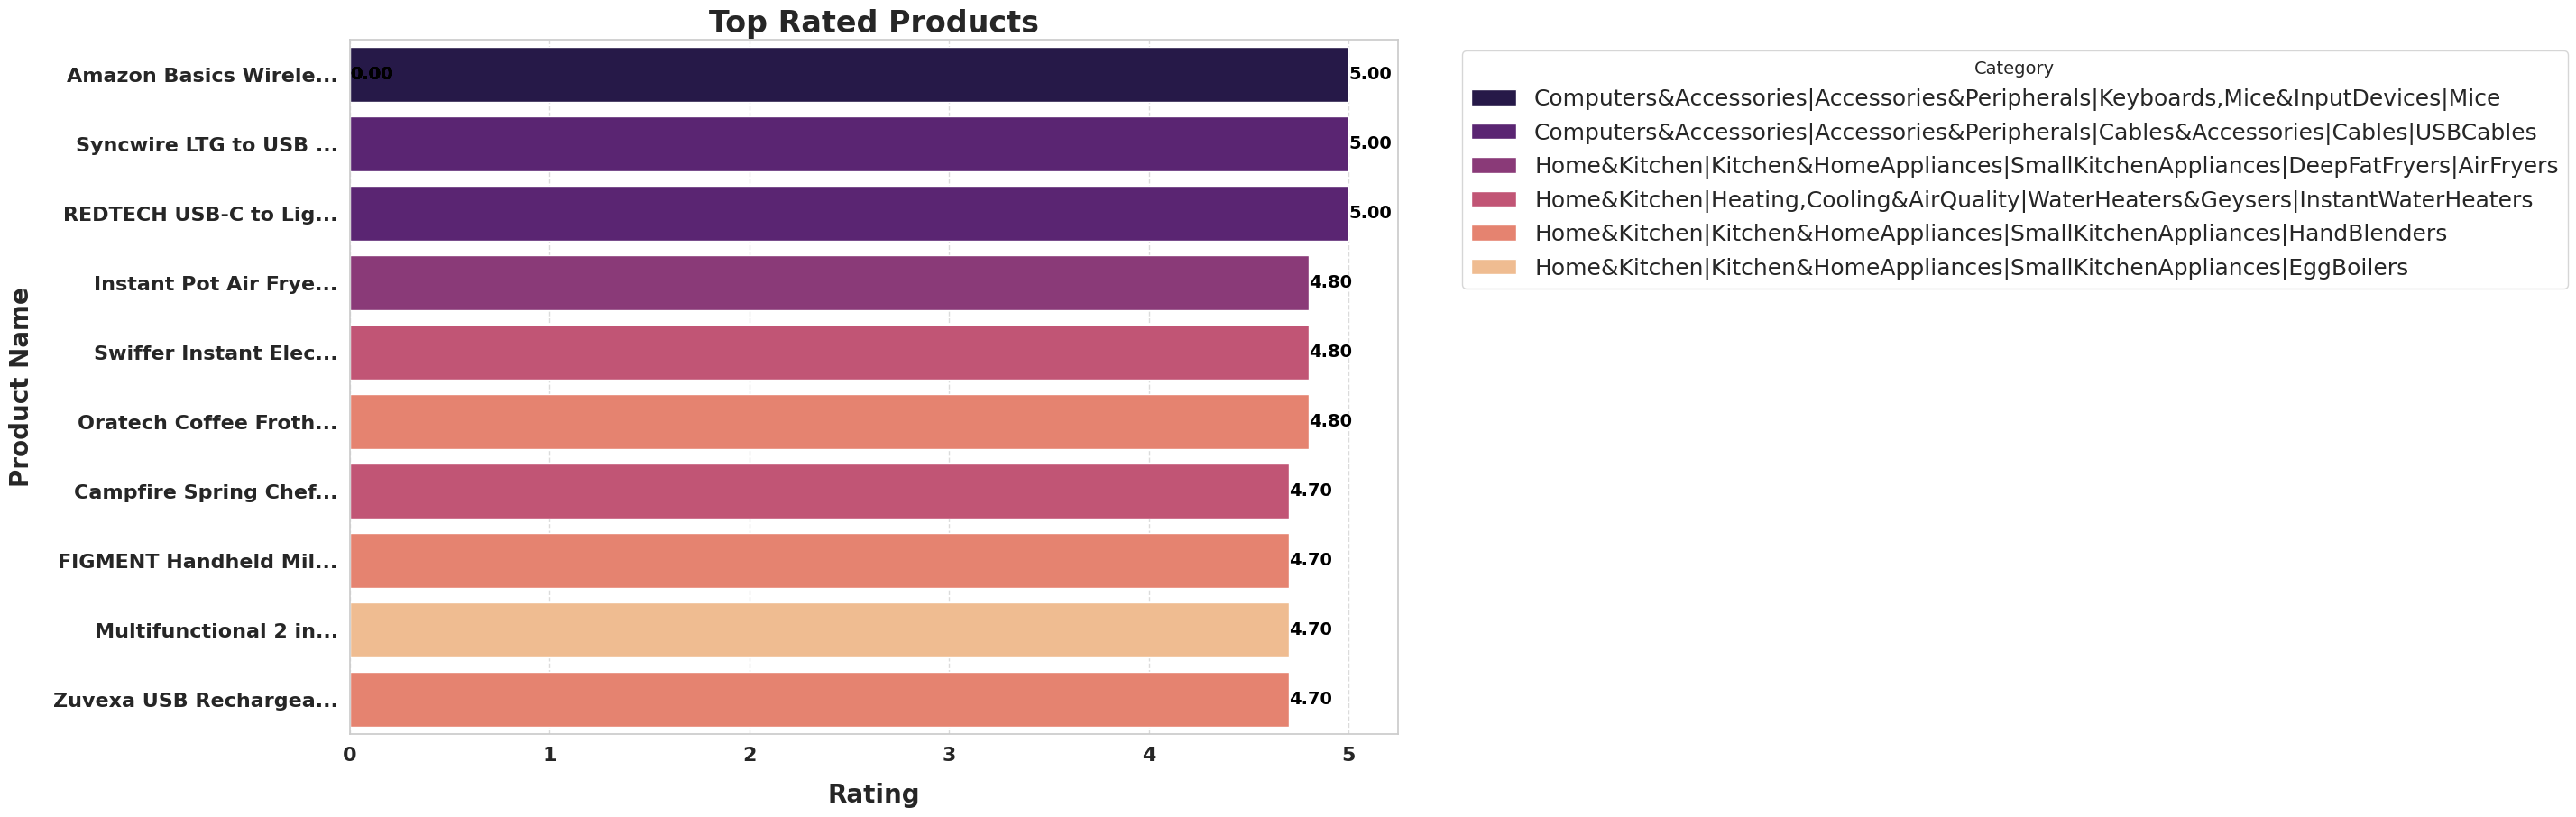

In [155]:
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]
top_rated_products['short_product_name'] = top_rated_products['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)
plt.figure(figsize=(15, 10))
unique_categories = top_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))
barplot = sns.barplot(data=top_rated_products, y='short_product_name', x='rating', hue='category', dodge=False, palette=category_color_map)
plt.title('Top Rated Products', fontsize=24, fontweight='bold')
plt.xlabel('Rating', fontsize=20, fontweight='bold', labelpad=15)
plt.ylabel('Product Name', fontsize=20, fontweight='bold', labelpad=15)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=14)
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}',
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center',
                     fontsize=14, fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [156]:
least_rated_products = df.sort_values(by='rating').head(10)
least_rated_products = least_rated_products[['category', 'product_id', 'product_name', 'rating']]
least_rated_products

,category,product_id,product_name,rating
1309,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters",B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-K0 2215,2.0
1243,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BFBNXS94,"Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)",2.3
1356,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging,2.6
1286,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders,B0BNDGL26T,"MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)",2.8
545,Electronics|WearableTechnology|SmartWatches,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black),2.8
1449,Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1,2.9
263,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",B09F6D21BY,7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,3.0
550,Electronics|WearableTechnology|SmartWatches,B0B82YGCF6,"Tokdis MX-1 Pro Bluetooth Calling Smartwatch - 1.69” LCD Display, Multiple Watch Faces, Sleep Monitor, Heart & SpO2 Monitoring, Multiple Sports Modes, Water Resistant",3.0
1315,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers,B08YK7BBD2,"Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer and Cutter Handheld Sealing Machine Portable Bag Resealer Sealer for Plastic Bags Food Storage Snack Fresh Bag Sealer (Including 2 AA Battery)",3.0
282,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0B94JPY2N,"Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)",3.0


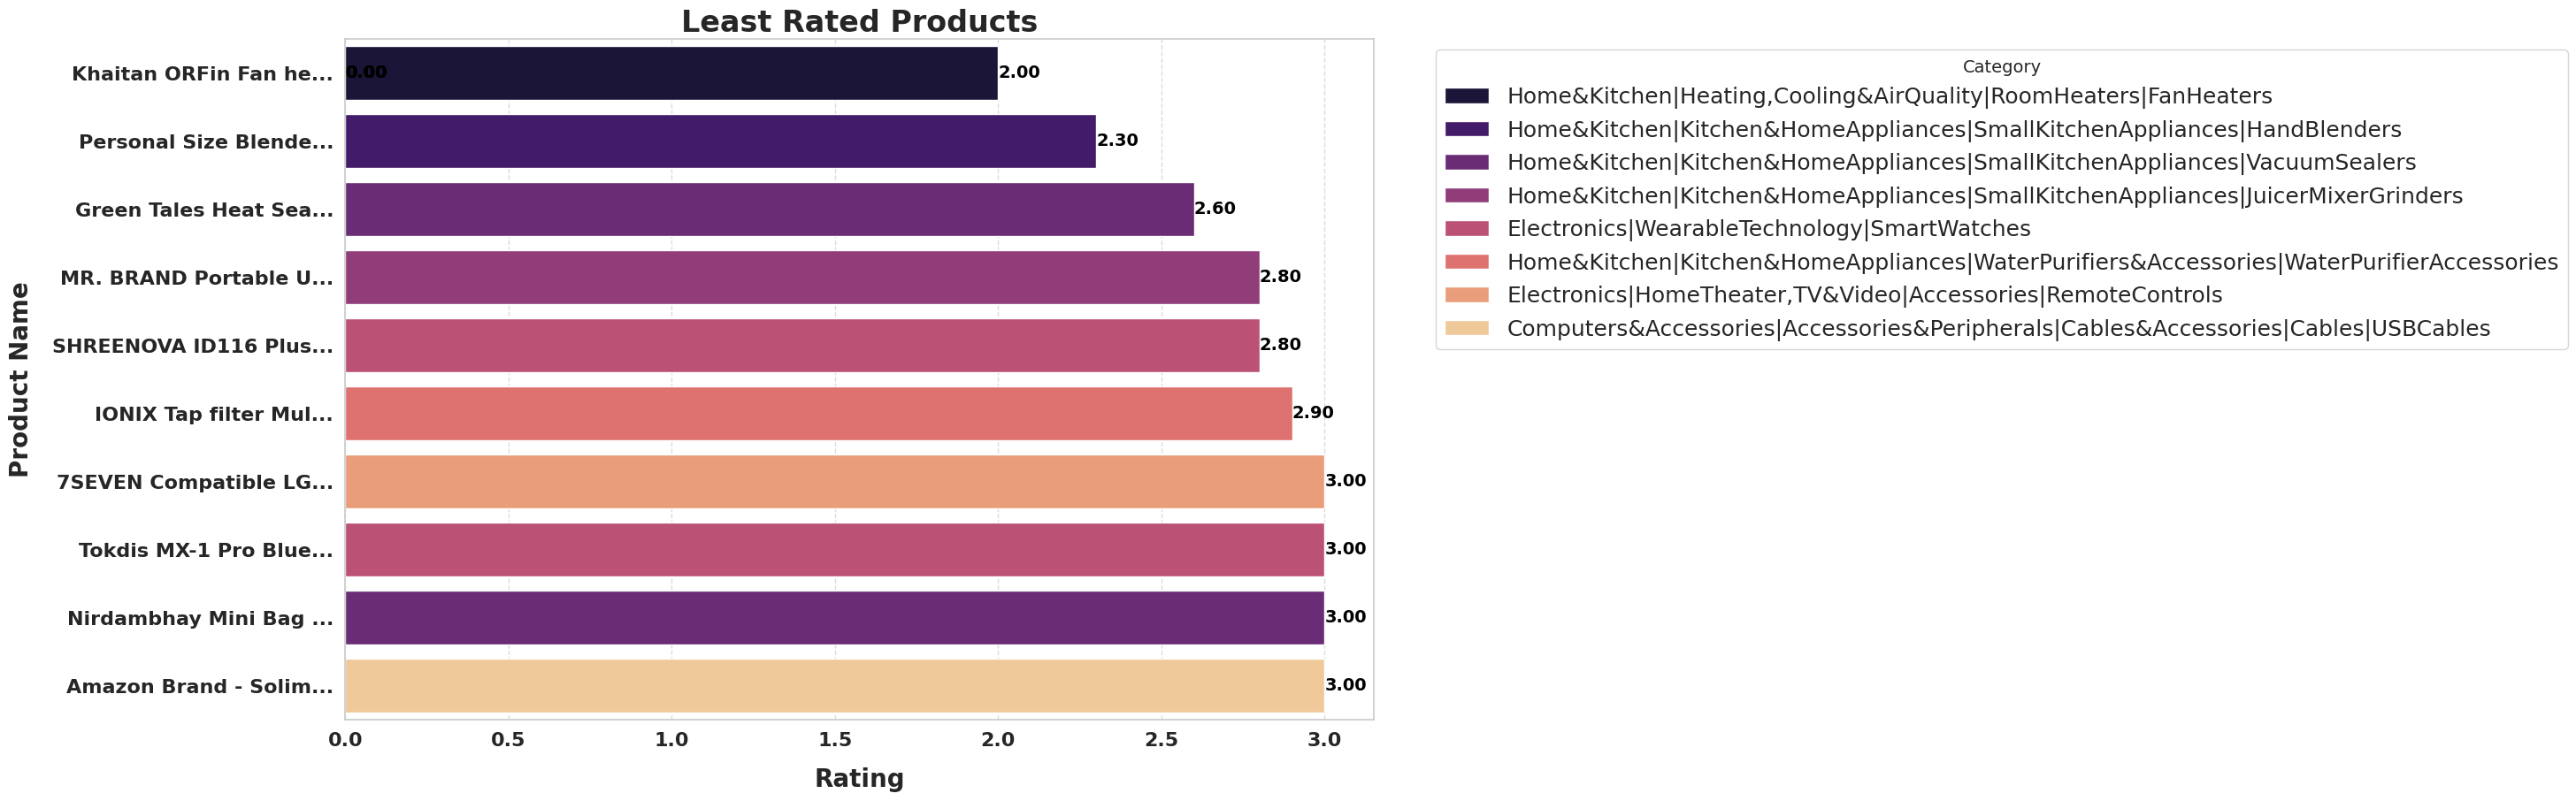

In [157]:
least_rated_products = df.sort_values(by='rating').head(10)
least_rated_products = least_rated_products[['category', 'product_id', 'product_name', 'rating']]
least_rated_products['short_product_name'] = least_rated_products['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)
plt.figure(figsize=(15, 10))
unique_categories = least_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))
barplot = sns.barplot(data=least_rated_products, y='short_product_name', x='rating', hue='category', dodge=False, palette=category_color_map)
plt.title('Least Rated Products', fontsize=24, fontweight='bold')
plt.xlabel('Rating', fontsize=20, fontweight='bold', labelpad=15)
plt.ylabel('Product Name', fontsize=20, fontweight='bold', labelpad=15)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=14)
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}',
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center',
                     fontsize=14, fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [158]:
df['price_range'] = pd.cut(df['discounted_price'], bins=[30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0],
                           labels = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+'])



price_rating_analysis = df.groupby('price_range').agg(
    mean_rating=('rating', 'mean'),
    product_count=('product_id', 'nunique'),
    average_rating_count=('rating_count', 'mean')
).reset_index()
price_rating_analysis


,price_range,mean_rating,product_count,average_rating_count
0,30-100,4.064444,40,7440.977778
1,100-500,4.075330,461,17813.723164
2,500-1000,4.117063,237,21177.813492
3,1000-5000,4.077355,410,18257.164733
4,5000-10000,4.141667,84,21546.571429
5,10000+,4.195082,119,16143.188525


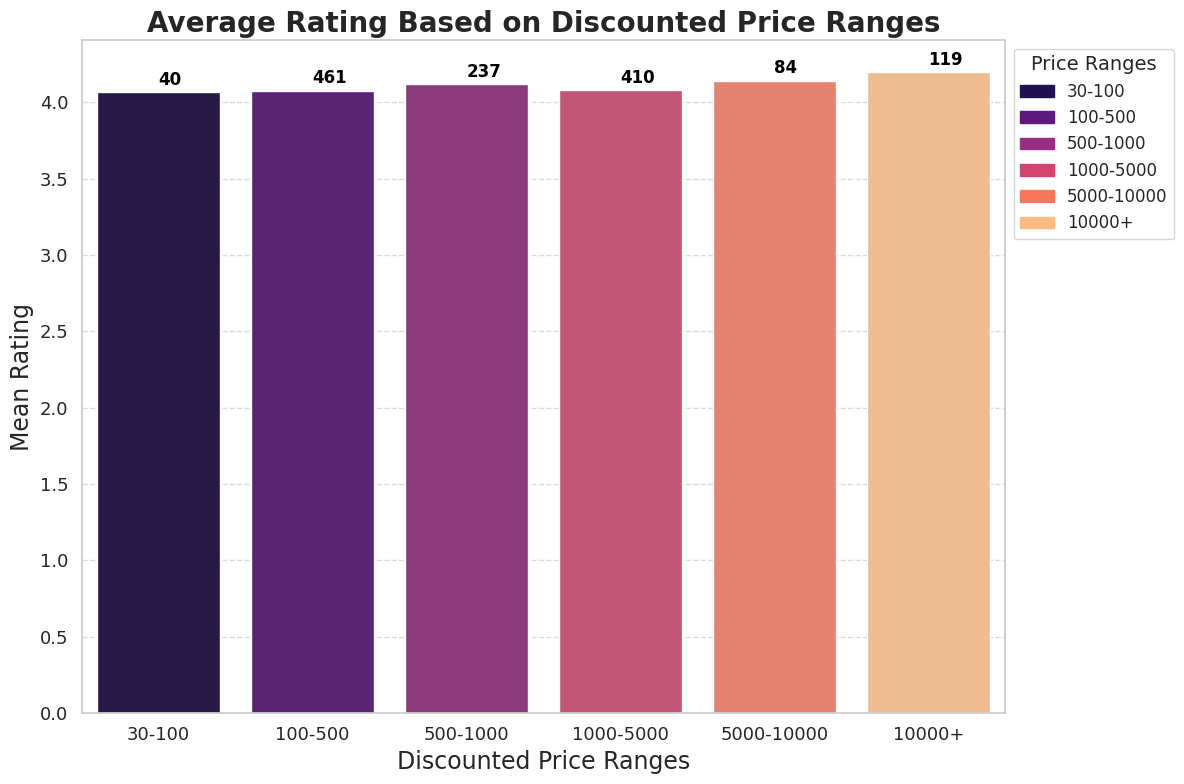

In [159]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=price_rating_analysis, x='price_range', y='mean_rating', palette='magma', capsize=0.1)
for index, row in price_rating_analysis.iterrows():
    plt.text(index, row['mean_rating'] + 0.05,
             f'{row["product_count"]}',
             fontsize=12,
             fontweight='bold',
             color='black')
plt.title('Average Rating Based on Discounted Price Ranges', fontsize=20, fontweight='bold')
plt.xlabel('Discounted Price Ranges', fontsize=17)
plt.ylabel('Mean Rating', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
from matplotlib.patches import Patch
colors = sns.color_palette('magma', len(price_rating_analysis))
legend_labels = price_rating_analysis['price_range'].tolist()
handles = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=handles, title='Price Ranges', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [160]:
category_product_counts = df.groupby('category').agg(
    product_count=('product_id', 'nunique'),
    total_reviews=('review_id', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()
category_product_counts['reviews_per_product'] = category_product_counts['total_reviews'] / category_product_counts['product_count']
category_product_counts.sort_values(by='mean_rating', ascending=False, inplace=True)
top_categories = category_product_counts.nlargest(10, 'product_count')
top_categories.sort_values(by='total_reviews', ascending=False)


,category,product_count,total_reviews,mean_rating,reviews_per_product
10,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,161,233,4.151931,1.447205
119,Electronics|WearableTechnology|SmartWatches,62,76,4.025000,1.225806
117,Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68,68,4.100000,1.000000
97,"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",60,63,4.209524,1.050000
76,"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",51,52,3.898077,1.019608
93,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49,49,3.800000,1.000000
169,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27,27,4.011111,1.000000
18,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24,24,4.287500,1.000000
181,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24,24,4.129167,1.000000
140,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",23,23,4.052174,1.000000


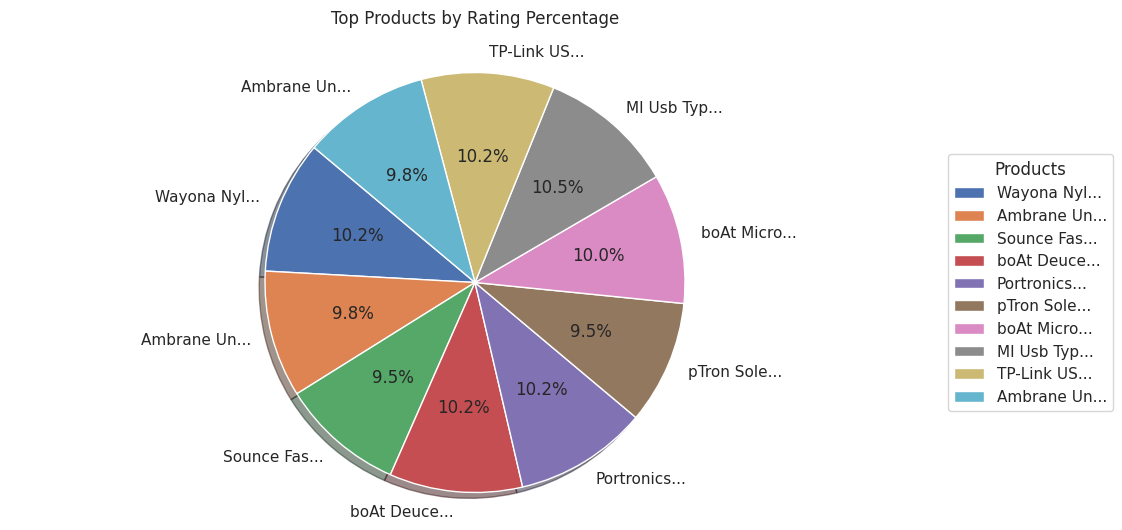

In [161]:
df['rating_percentage'] = (df['rating'] / 5) * 100
top_products = df[['product_id', 'product_name', 'category', 'rating_percentage']].head(10)
top_products['label'] = top_products['product_name'].str[:10] + '...'
plt.figure(figsize=(12, 6))
plt.pie(top_products['rating_percentage'], labels=top_products['label'], autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top Products by Rating Percentage', pad=20)
plt.axis('equal')
plt.legend(top_products['label'], title='Products', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [162]:
df['rating_percentage'] = (df['rating'] / 5) * 100
df[['product_id', 'product_name', 'category', 'rating', 'rating_percentage']].head()


,product_id,product_name,category,rating,rating_percentage
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,84.0
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.0,80.0
2,B096MSW6CT,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,3.9,78.0
3,B08HDJ86NZ,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,84.0
4,B08CF3B7N1,"Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,84.0


In [163]:
category_counts = df['category'].value_counts()
top_10_categories = category_counts.nlargest(10)
top_10_category_products = df[df['category'].isin(top_10_categories.index)]
top_10_categories

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24


In [165]:
category_summary = df.groupby('category').agg(
    product_count=('product_id', 'count'),
    average_rating=('rating', 'mean')
).reset_index()
top_categories = category_summary.sort_values(by='product_count', ascending=False).head(10)
top_categories


,category,product_count,average_rating
10,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233,4.151931
119,Electronics|WearableTechnology|SmartWatches,76,4.025000
117,Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68,4.100000
97,"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63,4.209524
76,"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52,3.898077
93,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49,3.800000
169,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27,4.011111
89,"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24,4.254167
181,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24,4.129167
18,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24,4.287500


In [168]:
print("Descriptive Statistics:")
print(df[['actual_price', 'discounted_price', 'rating']].describe())
correlation_actual = df['actual_price'].corr(df['rating'])
correlation_discounted = df['discounted_price'].corr(df['rating'])
print("\nCorrelation between Actual Price and Rating:", correlation_actual)
print("Correlation between Discounted Price and Rating:", correlation_discounted)

Descriptive Statistics:
        actual_price  discounted_price       rating
count    1465.000000       1465.000000  1465.000000
mean     5444.990635       3125.310874     4.096546
std     10874.826864       6944.304394     0.291578
min        39.000000         39.000000     2.000000
25%       800.000000        325.000000     4.000000
50%      1650.000000        799.000000     4.100000
75%      4295.000000       1999.000000     4.300000
max    139900.000000      77990.000000     5.000000

Correlation between Actual Price and Rating: 0.121672970756719
Correlation between Discounted Price and Rating: 0.12035456289817406


In [169]:
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)
average_rating_actual = df.groupby('actual_price_group')['rating'].mean().reset_index()
average_rating_actual.columns = ['Actual Price Group', 'Average Rating']
average_rating_actual = average_rating_actual.sort_values(by='Average Rating', ascending=False).head(10)
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)
average_rating_discounted = df.groupby('discounted_price_group')['rating'].mean().reset_index()
average_rating_discounted.columns = ['Discounted Price Group', 'Average Rating']
average_rating_discounted = average_rating_discounted[average_rating_discounted['Discounted Price Group'].notnull()]
print("\nAverage Rating by Actual Price Group:")
print(average_rating_actual)

print("\nAverage Rating by Discounted Price Group:")
print(average_rating_discounted)



Average Rating by Actual Price Group:
  Actual Price Group  Average Rating
5             10000+        4.178836
0             30-100        4.121429
2           500-1000        4.090031
3          1000-5000        4.087131
4         5000-10000        4.074242
1            100-500        4.071359

Average Rating by Discounted Price Group:
  Discounted Price Group  Average Rating
0                 30-100        4.064444
1                100-500        4.075330
2               500-1000        4.117063
3              1000-5000        4.077355
4             5000-10000        4.141667
5                 10000+        4.195082


In [171]:
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)
total_ratings_actual = df.groupby('actual_price_group')['rating'].max().reset_index()
total_ratings_actual.columns = ['Actual Price Group', 'Max Ratings']
max_ratings_count = total_ratings_actual['Max Ratings'].max()
total_ratings_actual['Percentage of Maximum Ratings (%)'] = (total_ratings_actual['Max Ratings'] / max_ratings_count) * 100
overall_max_rating = total_ratings_actual['Max Ratings'].max()
print("\nTotal Ratings and Percentage of Maximum Ratings by Actual Price Group:")
print(total_ratings_actual)
print(f"\nOverall Maximum Rating across all groups: {overall_max_rating}")



Total Ratings and Percentage of Maximum Ratings by Actual Price Group:
  Actual Price Group  Max Ratings  Percentage of Maximum Ratings (%)
0             30-100          4.4                               88.0
1            100-500          4.8                               96.0
2           500-1000          5.0                              100.0
3          1000-5000          5.0                              100.0
4         5000-10000          4.6                               92.0
5             10000+          4.8                               96.0

Overall Maximum Rating across all groups: 5.0


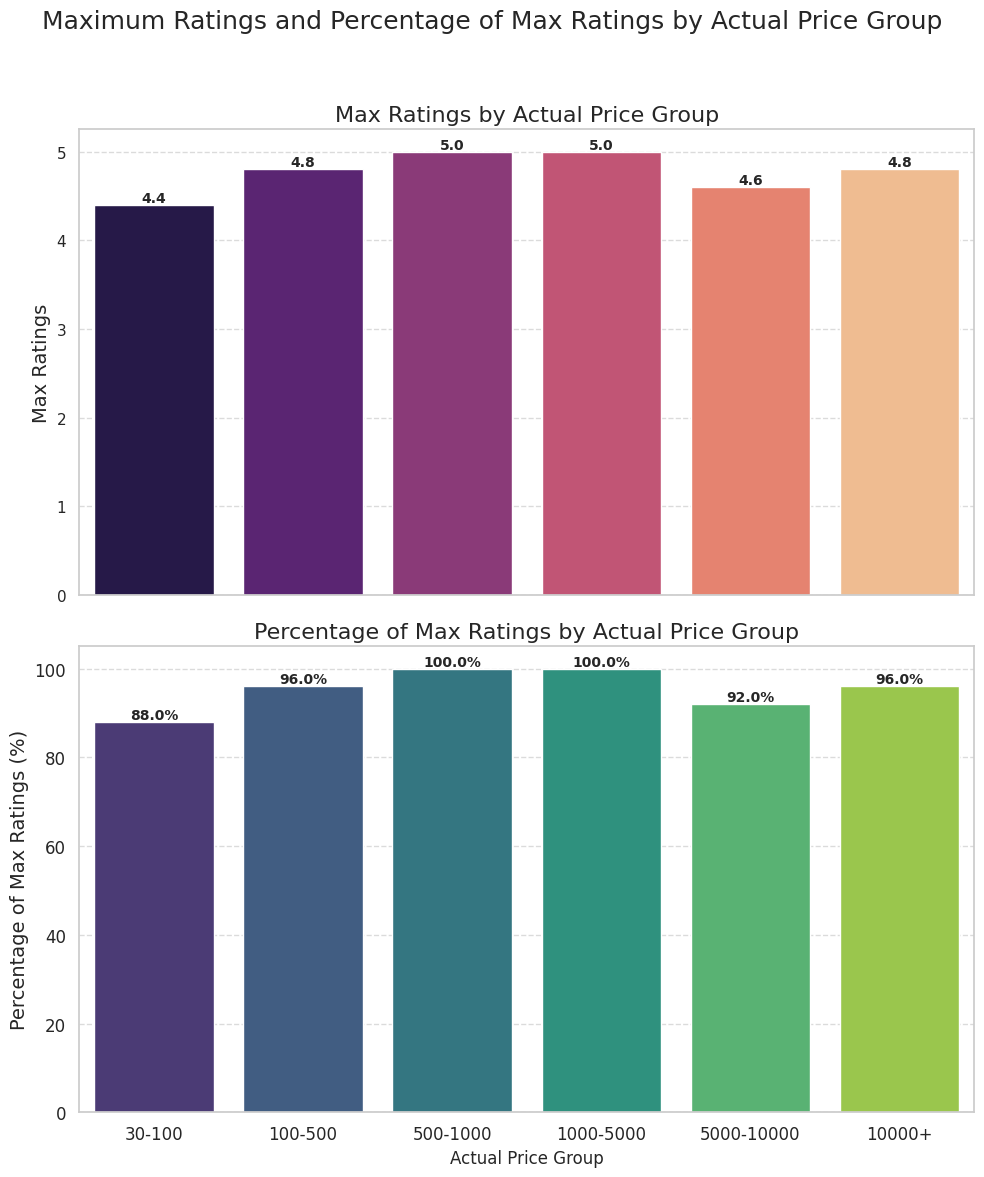

In [172]:
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)
total_ratings_actual = df.groupby('actual_price_group')['rating'].max().reset_index()
total_ratings_actual.columns = ['Actual Price Group', 'Max Ratings']
max_ratings_count = total_ratings_actual['Max Ratings'].max()
total_ratings_actual['Percentage of Max Ratings (%)'] = (total_ratings_actual['Max Ratings'] / max_ratings_count) * 100
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
fig.suptitle('Maximum Ratings and Percentage of Max Ratings by Actual Price Group', fontsize=18)
bar_plot_max = sns.barplot(data=total_ratings_actual,
                            x='Actual Price Group',
                            y='Max Ratings',
                            palette='magma',
                            ax=axes[0])
axes[0].set_title('Max Ratings by Actual Price Group', fontsize=16)
axes[0].set_ylabel('Max Ratings', fontsize=14)
for p in bar_plot_max.patches:
    bar_plot_max.annotate(f'{p.get_height()}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom',
                          fontsize=10, fontweight='bold')
bar_plot_percentage = sns.barplot(data=total_ratings_actual,
                                   x='Actual Price Group',
                                   y='Percentage of Max Ratings (%)',
                                   palette='viridis',
                                   ax=axes[1])
axes[1].set_title('Percentage of Max Ratings by Actual Price Group', fontsize=16)
axes[1].set_ylabel('Percentage of Max Ratings (%)', fontsize=14)
for p in bar_plot_percentage.patches:
    bar_plot_percentage.annotate(f'{p.get_height():.1f}%',
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='bottom',
                                 fontsize=10, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [173]:
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)
max_ratings_discounted = df.groupby('discounted_price_group')['rating'].max().reset_index()
max_ratings_discounted.columns = ['Discounted Price Group', 'Max Ratings']
total_max_ratings_count = max_ratings_discounted['Max Ratings'].max()
max_ratings_discounted['Percentage of Max Ratings (%)'] = (max_ratings_discounted['Max Ratings'] / total_max_ratings_count) * 100
print("\nMax Ratings and Percentage of Max Ratings by Discounted Price Group:")
print(max_ratings_discounted)



Max Ratings and Percentage of Max Ratings by Discounted Price Group:
  Discounted Price Group  Max Ratings  Percentage of Max Ratings (%)
0                 30-100          4.5                           90.0
1                100-500          5.0                          100.0
2               500-1000          4.7                           94.0
3              1000-5000          4.8                           96.0
4             5000-10000          4.6                           92.0
5                 10000+          4.7                           94.0


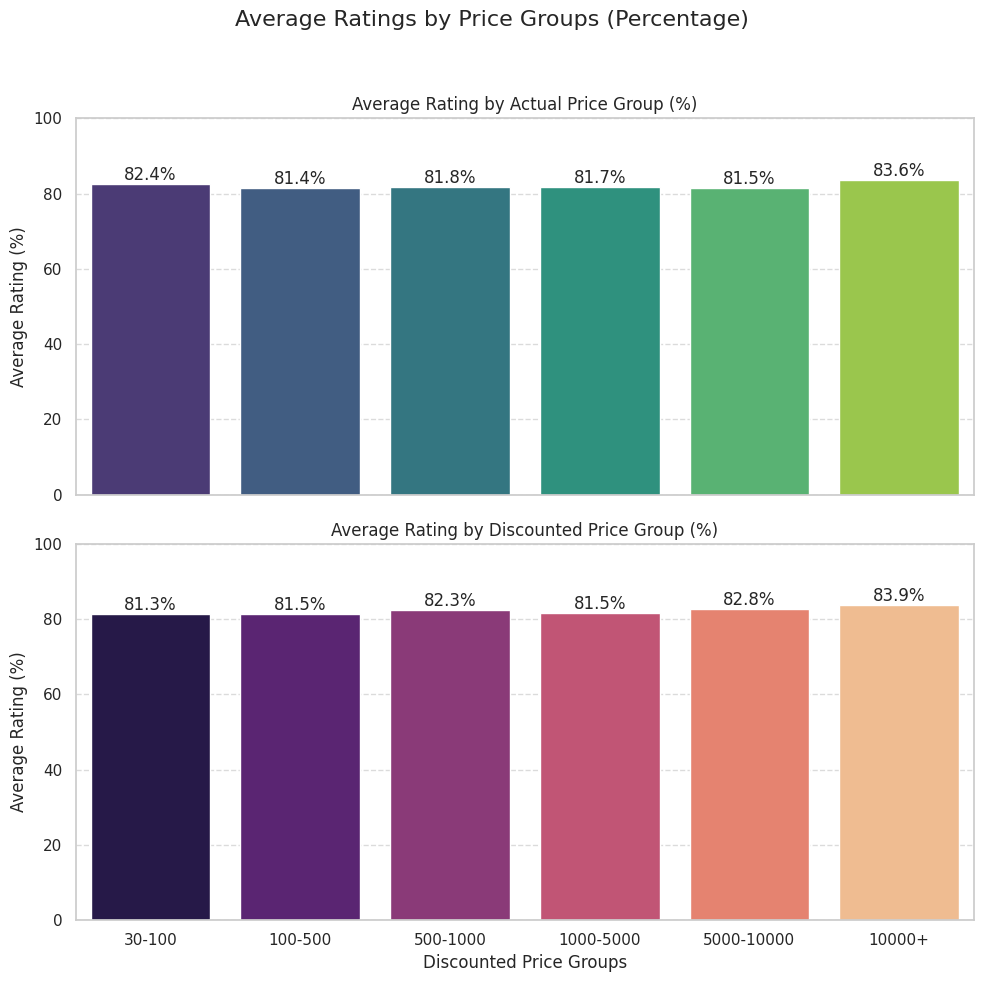

In [208]:
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)
average_rating_actual = df.groupby('actual_price_group')['rating'].mean().reset_index()
average_rating_actual.columns = ['Actual Price Group', 'Average Rating']
average_rating_actual['Average Rating (%)'] = (average_rating_actual['Average Rating'] / 5) * 100
average_rating_actual = average_rating_actual.sort_values(by='Average Rating', ascending=False)
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)
average_rating_discounted = df.groupby('discounted_price_group')['rating'].mean().reset_index()
average_rating_discounted.columns = ['Discounted Price Group', 'Average Rating']
average_rating_discounted = average_rating_discounted[average_rating_discounted['Discounted Price Group'].notnull()]
average_rating_discounted['Average Rating (%)'] = (average_rating_discounted['Average Rating'] / 5) * 100
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Average Ratings by Price Groups (Percentage)', fontsize=16)
bar_actual = sns.barplot(ax=axes[0], x='Actual Price Group', y='Average Rating (%)', data=average_rating_actual, palette='viridis')
axes[0].set_title('Average Rating by Actual Price Group (%)')
axes[0].set_ylabel('Average Rating (%)')
axes[0].set_ylim(0, 100)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for p in bar_actual.patches:
    axes[0].annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')
bar_discounted = sns.barplot(ax=axes[1], x='Discounted Price Group', y='Average Rating (%)', data=average_rating_discounted, palette='magma')
axes[1].set_title('Average Rating by Discounted Price Group (%)')
axes[1].set_ylabel('Average Rating (%)')
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for p in bar_discounted.patches:
    axes[1].annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')
plt.xlabel('Discounted Price Groups')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [209]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Actual Price vs Rating', 'Discounted Price vs Rating'))
actual_price_color = 'rgba(75, 0, 130, 0.8)'
discounted_price_color = 'rgba(255, 20, 147, 0.8)'
fig.add_trace(
    go.Scatter(
        x=df['actual_price'],
        y=df['rating'],
        mode='markers',
        marker=dict(size=10, color=actual_price_color),
        name='Actual Price'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=df['discounted_price'],
        y=df['rating'],
        mode='markers',
        marker=dict(size=10, color=discounted_price_color),
        name='Discounted Price'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Effect of Actual and Discounted Price on Ratings',
    height=500,
    width=1000,
    showlegend=True
)

fig.update_xaxes(tickformat='f', row=1, col=1)
fig.update_xaxes(tickformat='f', row=1, col=2)
fig.update_yaxes(title_text='Rating', row=1, col=1)
fig.update_yaxes(title_text='Rating', row=1, col=2)
fig.show()


summary :
* According to this dataset, the actual maximum price of Amazon sales products is **139900.000000**, while the discounted price is **77990.000000**. The percentage discount on this Amazon sales product is approximately **44.26%**. Hence, the product is being sold at **44.26%** off its original price.
* The minimum actual and discounted price of Amazon sales products is **39.0**.
* According to this dataset, the maximum ratings of Amazon sales products is **5.0**.
* The correlation between actual price and rating is **0.121672970756719**.
* The correlation between discounted price and rating is **0.12035456289817406**.
* Actual price and ratings, discounted price and ratings have a positive but very low correlation, meaning that the actual price or the price after discounts on Amazon sales products does not greatly affect the ratings according to this dataset.


In [178]:
avg_ratings = df.groupby('product_id')['rating'].mean()
top_10_avg_ratings = avg_ratings.nlargest(10)
top_10_products = df[df['product_id'].isin(top_10_avg_ratings.index)]
top_10_product_info = top_10_products[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
top_10_product_info['average_rating'] = top_10_avg_ratings.values
print("Top 10 Products with Highest Average Ratings:")
for product_id, row in top_10_product_info.iterrows():
    print(f"Product ID: {product_id} - Product Name: {row['product_name']} - Average Rating: {row['average_rating']:.1f}")
print("\nProduct IDs and Their Average Ratings:")
for product_id in top_10_product_info.index:
    avg_rating = top_10_product_info.loc[product_id, 'average_rating']
    print(f"Product ID: {product_id} - Average Rating: {avg_rating:.1f}")


Top 10 Products with Highest Average Ratings:
Product ID: B0BP7XLX48 - Product Name: Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White) - Average Rating: 5.0
Product ID: B09WN3SRC7 - Product Name: Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black) - Average Rating: 5.0
Product ID: B0BQRJ3C47 - Product Name: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White - Average Rating: 5.0
Product ID: B0B23LW7NV - Product Name: Spigen EZ Fit Tempered Glass Screen Protector for iPhone 14 Pro Max - 2 Pack (Sensor Protection) - Average Rating: 4.8
Product ID: B09ZHCJDP1 - Product Name: Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous 

In [211]:
numerical_columns = [
    'discounted_price',
    'actual_price',
    'discount_percentage',
    'rating',
    'rating_count'
]

correlation_matrix = df[numerical_columns].corr(method='spearman')
print("\nCorrelation Matrix:")
correlation_matrix



Correlation Matrix:


,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.932787,-0.372991,0.079823,0.122685
actual_price,0.932787,1.000000,-0.066363,0.033293,0.093540
discount_percentage,-0.372991,-0.066363,1.000000,-0.145411,-0.097028
rating,0.079823,0.033293,-0.145411,1.000000,0.182286
rating_count,0.122685,0.093540,-0.097028,0.182286,1.000000


In [183]:
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
correlation_matrix



Correlation Matrix:


,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961915,-0.242412,0.120355,-0.027095
actual_price,0.961915,1.000000,-0.118098,0.121673,-0.035974
discount_percentage,-0.242412,-0.118098,1.000000,-0.155065,0.011127
rating,0.120355,0.121673,-0.155065,1.000000,0.102148
rating_count,-0.027095,-0.035974,0.011127,0.102148,1.000000


In [185]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [212]:
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['review_content'].apply(get_sentiment)
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
def get_top_words(reviews, n=10):
    words = re.findall(r'\w+', reviews.lower())
    word_counts = Counter(words)
    return word_counts.most_common(n)
positive_words = ' '.join(df[df['sentiment'] == 'Positive']['review_content'])
negative_words = ' '.join(df[df['sentiment'] == 'Negative']['review_content'])
neutral_words = ' '.join(df[df['sentiment'] == 'Neutral']['review_content'])

print("\nTop 10 Positive Words:")
print(get_top_words(positive_words, 20))

print("\nTop 10 Negative Words:")
print(get_top_words(negative_words, 20))

print("\nTop 10 Neutral Words:")
print(get_top_words(neutral_words, 20))


sentiment
Positive    1438
Negative      26
Neutral        1
Name: count, dtype: int64

Top 10 Positive Words:
[('the', 13797), ('is', 9807), ('it', 9556), ('and', 9360), ('to', 7770), ('i', 7363), ('for', 6551), ('good', 6421), ('a', 6126), ('this', 4893), ('of', 4515), ('in', 4130), ('product', 3902), ('but', 3567), ('not', 3373), ('with', 3273), ('you', 2838), ('very', 2526), ('on', 2419), ('quality', 2400)]

Top 10 Negative Words:
[('the', 113), ('it', 106), ('is', 103), ('and', 93), ('to', 88), ('i', 73), ('not', 51), ('product', 44), ('but', 40), ('you', 39), ('in', 34), ('good', 33), ('for', 31), ('of', 29), ('this', 26), ('very', 23), ('like', 23), ('my', 21), ('on', 19), ('time', 19)]

Top 10 Neutral Words:
[('small', 2), ('okay', 2), ('is', 2), ('pages', 1), ('are', 1), ('best', 1), ('product', 1), ('but', 1), ('size', 1), ('too', 1), ('quality', 1), ('goodgreat', 1), ('notebook', 1), ('beast', 1), ('paper', 1), ('and', 1), ('spring', 1), ('good', 1), ('https', 1), ('m', 1)]


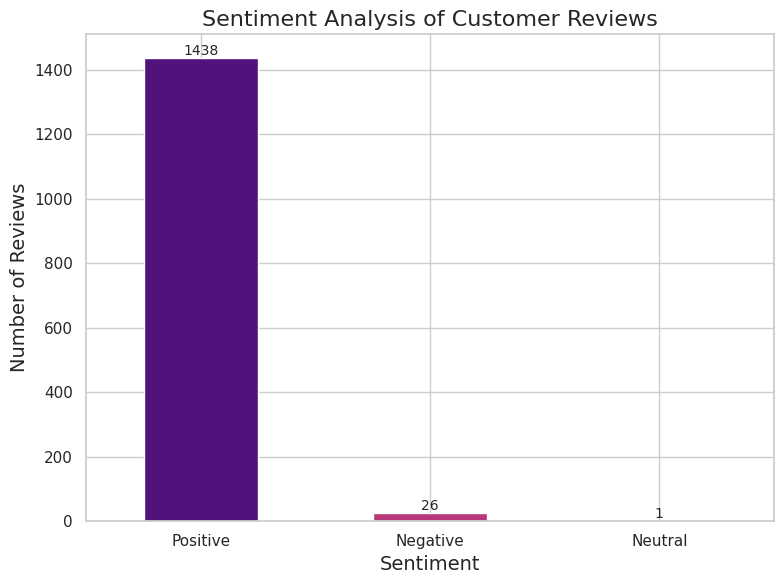

In [213]:
sentiment_counts = pd.Series({'Positive': 1438, 'Negative': 26, 'Neutral': 1})
sns.set(style='whitegrid')
palette = sns.color_palette("magma", n_colors=len(sentiment_counts))
plt.figure(figsize=(8, 6))
bars = sentiment_counts.plot(kind='bar', color=palette)
plt.title('Sentiment Analysis of Customer Reviews', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=0)
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.tight_layout()
plt.show()


In [189]:
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity
df['sentiment'] = df['review_content'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
sentiment_summary = df['sentiment_label'].value_counts(normalize=True) * 100
print("Sentiment Label Percentage (Percentage of Reviews):")
for label, percentage in sentiment_summary.items():
    print(f"{label}: {percentage:.2f}%")
fig = px.pie(sentiment_summary, values=sentiment_summary.values, names=sentiment_summary.index,
             title='Sentiment Label Percentage of Customer Reviews')
fig.show()


Sentiment Label Percentage (Percentage of Reviews):
Positive: 98.16%
Negative: 1.77%
Neutral: 0.07%


In [191]:
sentiment_counts = df['sentiment_label'].value_counts()
top_sentiments = sentiment_counts.nlargest(10).index.tolist()
df_top_sentiments = df[df['sentiment_label'].isin(top_sentiments)]
average_rating_by_sentiment = df_top_sentiments.groupby('sentiment_label')['rating'].mean().reset_index()
print(average_rating_by_sentiment)
average_rating_by_sentiment['count'] = df_top_sentiments['sentiment_label'].value_counts().values
fig_pie = px.pie(
    average_rating_by_sentiment,
    values='rating',
    names='sentiment_label',
    title='Average Rating by Sentiment',
    hover_data=['rating', 'count'],
    color='sentiment_label',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_pie.update_traces(
    hovertemplate='<b>%{label}</b><br>Average Rating: %{value:.2f}<br>Count: %{customdata[0]}',
    customdata=average_rating_by_sentiment[['count']].values
)
fig_pie.show()


  sentiment_label    rating
0        Negative  3.919231
1         Neutral  4.200000
2        Positive  4.099680


summary :
* According to this dataset, the highest positive sentiments are present, with a count of about **1438**.
* There are very few negative sentiments, with a count of about **26**.
* Only **1** neutral sentiment is present.
* Mostly positive words include: **Good, Quality, Use, Cable, Amazon, Easy, Price**.
* Mostly negative words include: **Working, Time, Press, Poor, Bad, Product, Money**.
* Mostly neutral words include: **Small, Size, Best, Notebook, Easy**.
* Positive sentiments percentage: **98.16%**
* Negative sentiments percentage: **1.77%**
* Neutral sentiments percentage: **0.07%**
* Negative sentiments have a rating of **3.919231**.
* Neutral sentiments have a rating of **4.200000**.
* Positive sentiments have a rating of **4.099680**.
* The highest rating is associated with positive sentiments and the lowest rating with negative sentiments.


In [192]:
average_rating_per_user = df.groupby('user_id')['rating'].mean()
lowest_rated_user_id = average_rating_per_user.idxmin()
lowest_average_rating = average_rating_per_user.min()

print(f"User ID with the lowest average rating: {lowest_rated_user_id}")
print(f"Highest average rating: {lowest_average_rating:.2f}")


User ID with the lowest average rating: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ
Highest average rating: 2.00


In [193]:
user_avg_ratings = df.groupby('user_id')['rating'].mean()
lowest_avg_ratings = user_avg_ratings.nsmallest(5)
users_with_lowest_avg_rating = lowest_avg_ratings.index.tolist()
print("Lowest Average Ratings:")
for user_id, avg_rating in lowest_avg_ratings.items():
    print(f"User ID: {user_id}, Average Rating: {avg_rating:.2f}")
print(f"\nUser ID(s) with the Lowest Average Ratings: {users_with_lowest_avg_rating}")


Lowest Average Ratings:
User ID: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ, Average Rating: 2.00
User ID: AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7UK5F7TGQHA6Q,AHAVCLRCPYO2MFYPTURF33N7XH5A,AE762UDUDQPW4R4QHHTIL7TPTJUA,AEGZSJIUSKF2EKIKGLNKY2CU6WXA, Average Rating: 2.30
User ID: AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35ANHRTU7FE7ZGA,AEZIOFC5L34FZZOMGKEHXHLG6KQA,AFDS7H2OSIL3I4CZBN7C7NS4XOXA,AEBSIJDEVFVOC7PQYB3W36OLAHNA,AGHY5MD6U2E57UWJTNGFKKQ5KROA,AF23NVMNXHKORCJCQPGAW6PSXMPA,AHSOUBG4CYVABTQRPHI64FAU4NLQ, Average Rating: 2.60
User ID: AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63EGZZZGO6HTNA,AGNSXRFJBDVGM7FS7YYPNCEO7XFQ,AHR53IW5LAAXGGFK3DRWRMXMM7KQ,AE5W6S5KCJV6L2WMBIOKYWQJN37Q,AH5J4DROVHI6XHMTCBAK7WWU3F4Q,AE5KAK3S3XZDPRUR2VCND2QNZTUQ,AEKG7ELYA43YNPZ2YT3ORIL2VSOA, Average Rating: 2.80
User ID: AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q4UMMRU3V3UA,AFC7PJA3XS6MHXYAUF3JZDHDUZWQ,AFL6U5G4P2KLLZU4HCOXES7ME2CQ,AFSSRLUEWTKDHYSAS36MDQQPYTKA,AG5UBF32OIHPW42GLXLBS4QOKKVA,AH

In [214]:
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_id = 'AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ'
similar_users = user_similarity_df[user_id].nlargest(5).index.tolist()
user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)
recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nsmallest(5).dropna()
recommended_products_df = pd.DataFrame(recommended_products, columns=['average_rating'])
recommended_products_df.index.name = 'product_id'
recommended_products_df.reset_index(inplace=True)
print("Recommended products based on lowest ratings from similar users:")
print(recommended_products_df)


Recommended products based on lowest ratings from similar users:
   product_id  average_rating
0  B0BPJBTB3F             2.0
1  B09V2PZDX8             4.0
2  B09V2Q4QVQ             4.0
3  B09YDFDVNS             4.0
4  B09YDFKJF8             4.0


In [195]:
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')
user_item_matrix.fillna(0, inplace=True)
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
def not_recommend_lowest_rated_products(user_id, num_recommendations=5):
    similar_users = user_similarity_df[user_id].nlargest(6).index.tolist()
    similar_users_ratings = user_item_matrix.loc[similar_users]
    similar_users_ratings_non_zero = similar_users_ratings.replace(0, np.nan)
    recommended_products = similar_users_ratings_non_zero.mean().nsmallest(num_recommendations).dropna()
    recommended_products_df = pd.DataFrame(recommended_products, columns=['average_rating'])
    recommended_products_df.index.name = 'product_id'
    recommended_products_df.reset_index(inplace=True)
    recommendations_with_details = recommended_products_df.merge(
        df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage']],
        on='product_id',
        how='left'
    )
    user_name = df.loc[df['user_id'] == user_id, 'user_name'].unique()
    recommendations_with_details['user_name'] = user_name[0] if user_name.size > 0 else 'Unknown'

    return recommendations_with_details
user_id = 'AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ'
recommended_items = not_recommend_lowest_rated_products(user_id)

print(f"Not Recommended products for user: {user_id} (User Name: {recommended_items['user_name'].iloc[0]})")
recommended_items


Not Recommended products for user: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ (User Name: Manidipa Sengupta,Vidisha)


,product_id,average_rating,product_name,category,discounted_price,actual_price,discount_percentage,user_name
0,B0BPJBTB3F,2.0,Khaitan ORFin Fan heater for Home and kitchen-K0 2215,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters",1299.0,2495.0,48,"Manidipa Sengupta,Vidisha"
1,B09V2PZDX8,4.0,"Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio | Blue",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1299.0,1599.0,19,"Manidipa Sengupta,Vidisha"
2,B09V2Q4QVQ,4.0,"Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio | Charcoal",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1299.0,1599.0,19,"Manidipa Sengupta,Vidisha"
3,B09YDFDVNS,4.0,"Nokia 105 Plus Single SIM, Keypad Mobile Phone with Wireless FM Radio, Memory Card Slot and MP3 Player | Red",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1324.0,1699.0,22,"Manidipa Sengupta,Vidisha"
4,B09YDFKJF8,4.0,"Nokia 105 Plus Single SIM, Keypad Mobile Phone with Wireless FM Radio, Memory Card Slot and MP3 Player | Charcoal",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1324.0,1699.0,22,"Manidipa Sengupta,Vidisha"


In [215]:
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'
similar_users = user_similarity_df[user_id].nlargest(5).index.tolist()
user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)
recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nlargest(5).dropna()
recommended_products_df = pd.DataFrame(recommended_products, columns=['average_rating'])
recommended_products_df.index.name = 'product_id'
recommended_products_df.reset_index(inplace=True)
print("Recommended products based on highest ratings from similar users:")
print(recommended_products_df)

Recommended products based on highest ratings from similar users:
   product_id  average_rating
0  B0BP7XLX48             5.0
1  B07ZR4S1G4             4.4
2  B09XJ1LM7R             4.3
3  B00HVXS7WC             4.2
4  B09V2PZDX8             4.0


In [200]:
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')
user_item_matrix.fillna(0, inplace=True)
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
def recommend_products(user_id, num_recommendations=5):
    similar_users = user_similarity_df[user_id].nlargest(6).index.tolist()
    user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)
    recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nlargest(num_recommendations).dropna()
    recommended_products_df = pd.DataFrame(recommended_products, columns=['average_rating'])
    recommended_products_df.index.name = 'product_id'
    recommended_products_df.reset_index(inplace=True)
    recommendations_with_details = recommended_products_df.merge(
        df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage']].drop_duplicates(),
        on='product_id',
        how='left'
    )
    user_name = df.loc[df['user_id'] == user_id, 'user_name'].unique()
    recommendations_with_details['user_name'] = user_name[0] if user_name.size > 0 else 'Unknown'

    return recommendations_with_details
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'
recommended_items = recommend_products(user_id)
print(f"Recommended products for user with user id: {user_id} (User Name: {recommended_items['user_name'].iloc[0]})")
recommended_items

Recommended products for user with user id: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ (User Name: Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta)


,product_id,average_rating,product_name,category,discounted_price,actual_price,discount_percentage,user_name
0,B0BP7XLX48,5.0,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1999.0,80,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
1,B07ZR4S1G4,4.4,Universal Remote Control for All Sony TV for All LCD LED and Bravia TVs Remote,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",239.0,699.0,66,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
2,B084MZXJNK,4.4,"Belkin Apple Certified Lightning To Type C Cable, Tough Unbreakable Braided Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters) White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,1599.0,1999.0,20,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
3,B084N133Y7,4.4,"Belkin Apple Certified Lightning To Type C Cable, Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters) White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,1499.0,1999.0,25,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
4,B09XJ1LM7R,4.3,7SEVEN® Compatible for Tata Sky Remote Original Set Top HD Box and Suitable for SD Tata Play setup Box Remote Control,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",399.0,799.0,50,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"


In [205]:
top_10_highest_rated_products = df.nlargest(10, 'rating')
print("Top 10 Highest Rated Products:")
for index, product in top_10_highest_rated_products.iterrows():
    print(f"\nProduct ID: {product['product_id']}")
    print(f"Product Name: {product['product_name']}")
    print(f"Category: {product['category']}")
    print(f"Rating: {product['rating']:.2f}")


Top 10 Highest Rated Products:

Product ID: B0BP7XLX48
Product Name: Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)
Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Rating: 5.00

Product ID: B0BQRJ3C47
Product Name: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Rating: 5.00

Product ID: B09ZHCJDP1
Product Name: Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop
Category: Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice
Rating: 5.00

Product ID: B

# <p style="background-color: #4b0b4e; font-family: 'Verdana', sans-serif; font-size: 28px; text-align: center; color: #f7f7f7; padding: 20px; border-radius: 50px; text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.6); border: 4px solid #ff6f61; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.5);">Summary</p>

* The **Amazon Sales Dataset** consists of **1465 rows and 16 columns**.
* According to this dataset, there are missing values present in the `ratings` and `rating_count` columns.
* There is a very small number of missing values in these columns:
  - The rating column has only **0.068259%** of missing values.
  - The rating count column has only **0.136519%** of missing values.
* There are no duplicates in this dataset.
* The highest average rating according to this dataset is **5.0**.
* According to this dataset, the product with the highest average rating is **Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type-C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop** with a product ID of **B09ZHCJDP1**.
* Similarly, the product **Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)** also has the highest average rating of about **5.0**, with a product ID of **B09WN3SRC7**.
* The product **REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White** also has the highest average rating of about **5.0**, with a product ID of **B0BQRJ3C47**.
* The Amazon sales discounted products in the price range **100-500** have the highest rating percentage of about **100%**. The rating of these products is about **5.0**.
* Similarly, according to this dataset, the maximum rating and maximum percentage rating is in the price range **1000-5000**, with a rating of about **5** and a rating percentage of **100%** for actual price products.
* The `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category has the most sales on Amazon, with a count of about **233**.
* The average rating of products in the `Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables` category is about **4.15**.
* The highest average rating according to this dataset is in the `Computers & Accessories | Tablets` category, with a rating of about **4.6** and a product count of **1**.
* The `Electronics | Home Theater, TV & Video | Televisions | Smart Televisions` category has the highest discount in Amazon sales, with a discount of about **44%** and a discounted price of **77990**.
*  there are the highest positive sentiments present, with a count of about **1438**. There are very few negative sentiments, with a count of about **26**, and only **1** neutral sentiment is present.
* The negative sentiment has a rating of **3.919231** according to this dataset, while the neutral sentiment has a rating of **4.200000**, and the positive sentiment has a rating of **4.099680**. Hence, neutral sentiments have the highest ratings.


In [220]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import re
from collections import Counter
def recommend_products_content_based(product_id, num_recommendations=5):
    product_features = df[['rating_count', 'rating']].copy()
    product_features['product_id'] = df['product_id']
    product_features = product_features.set_index('product_id')
    product_similarity = cosine_similarity(product_features.fillna(0))
    product_similarity_df = pd.DataFrame(product_similarity, index=product_features.index, columns=product_features.index)
    similar_products = product_similarity_df[product_id].nlargest(num_recommendations + 1).index.tolist()[1:]
    return df[df['product_id'].isin(similar_products)][['product_id', 'product_name', 'category', 'rating']]
product_id_to_recommend = "B09ZHCJDP1"
recommended_products = recommend_products_content_based(product_id_to_recommend)
print(f"Content-based recommendations for product {product_id_to_recommend}:\n{recommended_products}")



Content-based recommendations for product B09ZHCJDP1:
      product_id  \
871   B07H8W9PB6   
1164  B08QW937WV   
1243  B0BFBNXS94   
1292  B0BMZ6SY89   
1436  B0BPBG712X   

                                                                                                                                                                                             product_name  \
871   KLAM LCD Writing Tablet Screenwriting Toys Board Smart Digital E-Note Pad 8.5 Inch Light Weight Magic Slate for Drawing Playing Noting by Kids and Adults Best Birthday Gift Girls Boys, Multicolor   
1164                      Homeistic Applience™ Instant Electric Water Heater Faucet Tap For Kitchen And Bathroom Sink Digital Water Heating Tap with Shower Head ABS Body- Shock Proof (Pack Of 1. White)   
1243                                           Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)   
1292 

In [230]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
df['rating_count'] = df['rating_count'].fillna(0)
df['conversion'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
df['category'] = np.random.choice(['A', 'B'], size=len(df))
model = smf.logit('conversion ~ group', data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.552957
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             conversion   No. Observations:                 1465
Model:                          Logit   Df Residuals:                     1463
Method:                           MLE   Df Model:                            1
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:               7.109e-06
Time:                        03:15:48   Log-Likelihood:                -810.08
converged:                       True   LL-Null:                       -810.09
Covariance Type:            nonrobust   LLR p-value:                    0.9145
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1372      0.086     13.202      0.000       0.968       1.306
group[T.B]     0.0131      0.